<a href="https://colab.research.google.com/github/taejoonlab/microbe-toolbox/blob/master/ProkFISHquant/ProkFISHquant-Sim1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

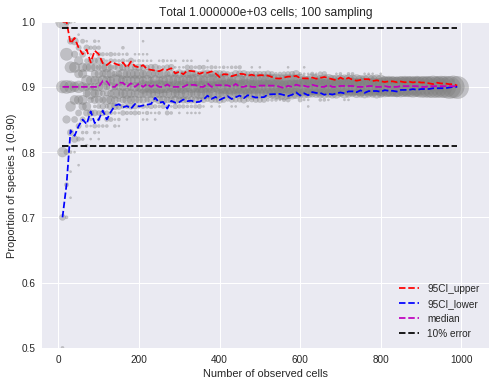

In [19]:
import random
import numpy as np
import matplotlib.pyplot as plt

count_sampling = 100

#total_num_cells = 1e6
#total_num_cells = 1e5
#total_num_cells = 1e4
total_num_cells = 1e3


sp1_percent = 0.90
sp2_percent = 1.0 - sp1_percent

sp1_cell_narray = np.zeros(int(total_num_cells*sp1_percent))
sp2_cell_narray = np.ones(int(total_num_cells*sp2_percent))
cell_list = list(sp1_cell_narray) + list(sp2_cell_narray)

random.shuffle(cell_list)

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(1,1,1)

#range_cell_count = range(10, 2500, 50)
range_cell_count = range(10, 1000, 10)

upper_95ci_idx = int(count_sampling*0.95)
median_idx = int(count_sampling*0.5)
lower_95ci_idx = int(count_sampling*0.05)

upper_95ci_list = []
lower_95ci_list = []
median_list = []

for tmp_cell_count in range_cell_count:
  y_list = []
  y_count = dict()   

  for i in range(0,count_sampling):
    imaged_cell_list = random.sample(list(cell_list), tmp_cell_count)
    tmp_sp1_percent = imaged_cell_list.count(0)/tmp_cell_count
    y_list.append(tmp_sp1_percent)

    tmp_sp1_percent_str = '%.2f' % (tmp_sp1_percent)
    
    if tmp_sp1_percent_str not in y_count:
      y_count[tmp_sp1_percent_str] = 0
      
    y_count[tmp_sp1_percent_str] += 1
          
    
  y_list_sorted = sorted(y_list)
  upper_95ci_list.append(y_list_sorted[upper_95ci_idx])
  lower_95ci_list.append(y_list_sorted[lower_95ci_idx])
  median_list.append(y_list_sorted[median_idx])
  
  #if upper_95ci_list[-1] < sp1_percent*1.1 and \
  #  lower_95ci_list[-1] > sp1_percent*0.9:
  #    print(tmp_cell_count, upper_95ci_list[-1], lower_95ci_list[-1])
  
  x_list = [tmp_cell_count for x in range(len(y_count))]
  y_key_list = sorted(y_count.keys())
  y_val_list = [float(tmp_y) for tmp_y in y_key_list]
  z_list = [y_count[tmp_y]*5 for tmp_y in y_key_list]
  ax1.scatter(x_list, y_val_list, s=z_list, alpha=0.4, c='grey')

ax1.plot(range_cell_count, upper_95ci_list, 'r--', label="95CI_upper")
ax1.plot(range_cell_count, lower_95ci_list, 'b--', label='95CI_lower')
ax1.plot(range_cell_count, median_list, 'm--', label="median")
ax1.plot(range_cell_count, [sp1_percent*1.1 for x in median_list], 'k--', label="10% error")
ax1.plot(range_cell_count, [sp1_percent*0.9 for x in median_list], 'k--')

#ax1.set_ylim(0.2,0.8)
ax1.set_title("Total %e cells; %d sampling" % (total_num_cells, count_sampling))
ax1.set_ylabel("Proportion of species 1 (%.2f)" % sp1_percent)
ax1.set_xlabel("Number of observed cells")
ax1.legend(loc='lower right')
ax1.set_ylim(0.5, 1.0)
#plt.show()

plt.savefig("plot-90-1e3.pdf")
from google.colab import files
files.download("plot-90-1e3.pdf")